In [241]:
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import statsmodels
#import bamboolib as bam
from statsmodels.tsa.seasonal import STL, seasonal_decompose
#bam.disable()

In [242]:
file_name = '/Users/dgalembeck/Documents/Coding/Marees/Daniel/PIIA-Marees/Data/1959_1963-200.csv'

In [243]:
from pandas import read_csv
data_ = read_csv(file_name, header=0, index_col=0, parse_dates=True, squeeze=True)

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/852440339.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data_ = read_csv(file_name, header=0, index_col=0, parse_dates=True, squeeze=True)


In [244]:
data = data_.drop(columns=['Source'])

In [245]:
data.Date = pd.to_datetime(data.Date)
data.Valeur = data.Valeur.astype(float)
data = data.set_index('Date')


array([<AxesSubplot: xlabel='Date'>], dtype=object)

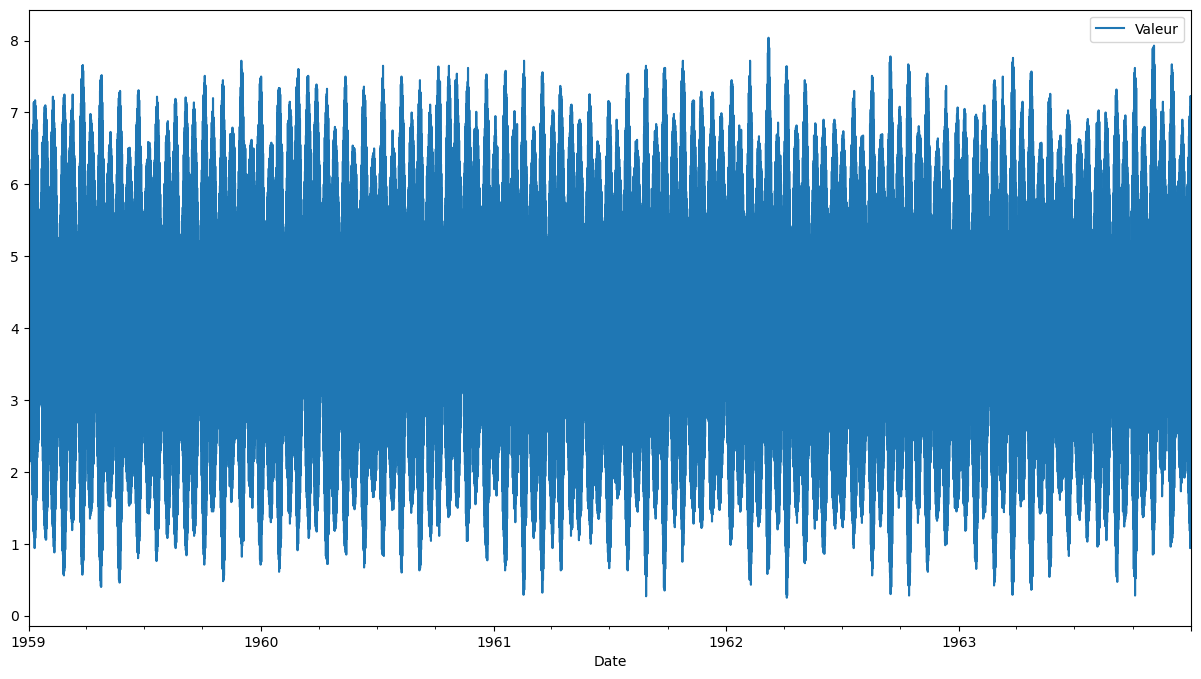

In [246]:
preprocessed = data.copy()
for key in preprocessed.keys():
    temp = preprocessed[key]
    nan_index = temp.isnull()
    temp = temp.interpolate('linear')
    results = seasonal_decompose(temp, period=24*30*12, model='additive', extrapolate_trend='freq')
    for i, real in enumerate(nan_index):
        if real == True:
            results.trend.iloc[i] = np.nan
            dt = str(results.resid.index[i])
            results.seasonal.iloc[i] = results.seasonal.loc[dt]
            results.resid.iloc[i] = results.resid.loc[dt]
            
    preprocessed[key] = results.trend.interpolate('linear') + results.seasonal + results.resid

preprocessed.plot(figsize=(15, 8), subplots=True)

In [247]:
# We have to separate de data for years.
# For this problem one year is like one cycle.
split1 = pd.to_datetime('1961/06/30 23:00:00')
split2 = pd.to_datetime('1961/07/01')

train1 = data[:split1]
test1 = data[split2:]
train1

,Valeur
Date,
1959-01-01 00:00:00,2.85
1959-01-01 01:00:00,2.20
1959-01-01 02:00:00,1.82
1959-01-01 03:00:00,2.15
1959-01-01 04:00:00,3.10
...,...
1961-06-30 19:00:00,6.38
1961-06-30 20:00:00,5.10
1961-06-30 21:00:00,3.66


In [248]:
train = preprocessed[:split1]
test = preprocessed[split2:]

In [249]:
print(train)
print('-' * 50)
print(test)

                     Valeur
Date                       
1959-01-01 00:00:00    2.85
1959-01-01 01:00:00    2.20
1959-01-01 02:00:00    1.82
1959-01-01 03:00:00    2.15
1959-01-01 04:00:00    3.10
...                     ...
1961-06-30 19:00:00    6.38
1961-06-30 20:00:00    5.10
1961-06-30 21:00:00    3.66
1961-06-30 22:00:00    2.29
1961-06-30 23:00:00    1.19

[21888 rows x 1 columns]
--------------------------------------------------
                     Valeur
Date                       
1961-07-01 00:00:00    0.66
1961-07-01 01:00:00    1.31
1961-07-01 02:00:00    2.63
1961-07-01 03:00:00    4.21
1961-07-01 04:00:00    5.67
...                     ...
1963-12-31 19:00:00    5.05
1963-12-31 20:00:00    3.70
1963-12-31 21:00:00    2.40
1963-12-31 22:00:00    1.34
1963-12-31 23:00:00    0.95

[21936 rows x 1 columns]


/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/3157296936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/3157296936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


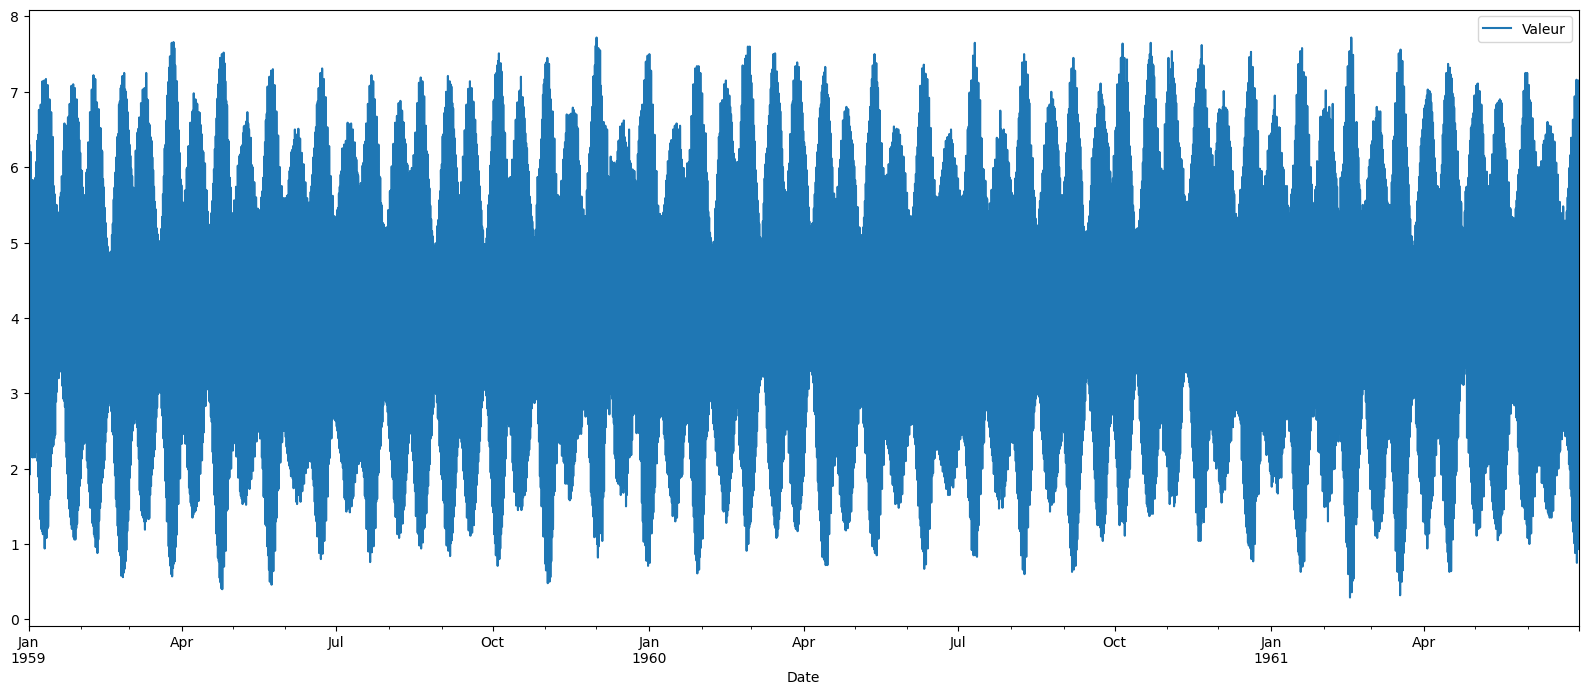

In [250]:
train.dropna(inplace=True)
test.dropna(inplace=True)
axes = train[dfcol].plot(figsize=(20, 8), subplots=True)

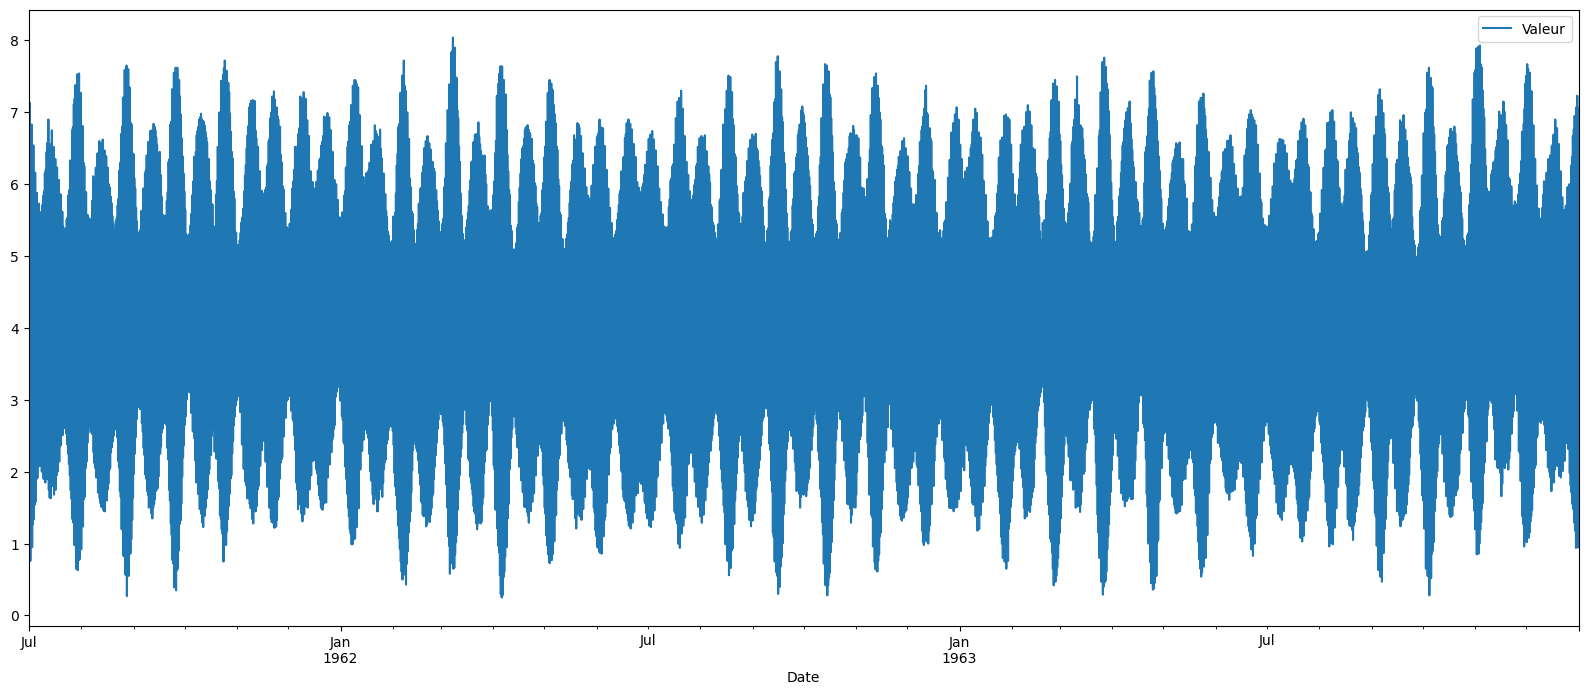

In [251]:
axes = test[dfcol].plot(figsize=(20, 8), subplots=True)

In [252]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

def timeseries_to_supervised(data, lag=1):
    """Frame a sequence data into a supervised learning problem, i.e., time sequence -> (X, y)"""
    df = DataFrame(data)  # DataFrame is a pandas class
    columns = [df.shift(i) for i in range(1, lag+1)]  # shift() pushed dataframe or a column vector downwards by i spaces
    columns.insert(0, df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)   # turn NaN to 0
    return df
# I haven't undertood this yet

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/3611892927.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [253]:
train = timeseries_to_supervised(train, 24)
test = timeseries_to_supervised(test, 24)

In [254]:
test.to_csv('test.csv')
train.to_csv('train.csv')
train = read_csv('train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
test = read_csv('test.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/1000565910.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/1000565910.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test = read_csv('test.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [255]:
test['Month'] = pd.DatetimeIndex(test.index).month
test['Hour'] = pd.DatetimeIndex(test.index).hour
test['Day'] = pd.DatetimeIndex(test.index).day

train['Month'] = pd.DatetimeIndex(train.index).month
train['Hour'] = pd.DatetimeIndex(train.index).hour
train['Day'] = pd.DatetimeIndex(train.index).day
train

,Valeur,Valeur.1,Valeur.2,Valeur.3,Valeur.4,Valeur.5,Valeur.6,Valeur.7,Valeur.8,Valeur.9,...,Valeur.18,Valeur.19,Valeur.20,Valeur.21,Valeur.22,Valeur.23,Valeur.24,Month,Hour,Day
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01 00:00:00,2.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,1
1959-01-01 01:00:00,2.20,2.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,1
1959-01-01 02:00:00,1.82,2.20,2.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,2,1
1959-01-01 03:00:00,2.15,1.82,2.20,2.85,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,3,1
1959-01-01 04:00:00,3.10,2.15,1.82,2.20,2.85,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961-06-30 19:00:00,6.38,7.15,7.07,6.26,4.88,3.30,1.85,0.93,1.03,1.89,...,2.16,1.10,0.75,1.34,2.50,3.87,5.28,6,19,30
1961-06-30 20:00:00,5.10,6.38,7.15,7.07,6.26,4.88,3.30,1.85,0.93,1.03,...,3.65,2.16,1.10,0.75,1.34,2.50,3.87,6,20,30
1961-06-30 21:00:00,3.66,5.10,6.38,7.15,7.07,6.26,4.88,3.30,1.85,0.93,...,5.20,3.65,2.16,1.10,0.75,1.34,2.50,6,21,30


In [256]:
test1['Month'] = pd.DatetimeIndex(test1.index).month
test1['Hour'] = pd.DatetimeIndex(test1.index).hour
test1['Day'] = pd.DatetimeIndex(test1.index).day

train1['Month'] = pd.DatetimeIndex(train1.index).month
train1['Hour'] = pd.DatetimeIndex(train1.index).hour
train1['Day'] = pd.DatetimeIndex(train1.index).day
train1

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/2226668798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Month'] = pd.DatetimeIndex(test1.index).month
/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/2226668798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Hour'] = pd.DatetimeIndex(test1.index).hour
/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/2226668798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Valeur,Month,Hour,Day
Date,,,,
1959-01-01 00:00:00,2.85,1,0,1
1959-01-01 01:00:00,2.20,1,1,1
1959-01-01 02:00:00,1.82,1,2,1
1959-01-01 03:00:00,2.15,1,3,1
1959-01-01 04:00:00,3.10,1,4,1
...,...,...,...,...
1961-06-30 19:00:00,6.38,6,19,30
1961-06-30 20:00:00,5.10,6,20,30
1961-06-30 21:00:00,3.66,6,21,30


In [257]:
test = test.loc[(test['Hour'] == 0) | (test['Hour'] == 12)]
test1 = test1.loc[(test1['Hour'] == 0) | (test1['Hour'] == 12)]

In [258]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

Y_train = train.filter(dfcol, axis=1)
X_train = train.drop(columns=dfcol)
X_train = sc_X.fit_transform(X_train)
Y_train = sc_y.fit_transform(Y_train)

Y_test = test.filter(dfcol, axis=1)
X_test = test.drop(columns=dfcol)
X_test = sc_X.fit_transform(X_test)
Y_test = sc_y.fit_transform(Y_test)

In [259]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

mod = MultiOutputRegressor(SVR(kernel='rbf'), n_jobs=4)
model1 = mod.fit(X_train,Y_train)

In [260]:
y_pred = model1.predict(X_test)
y_new_inverse = sc_y.inverse_transform(y_pred)
y_inverse = sc_y.inverse_transform(Y_test)

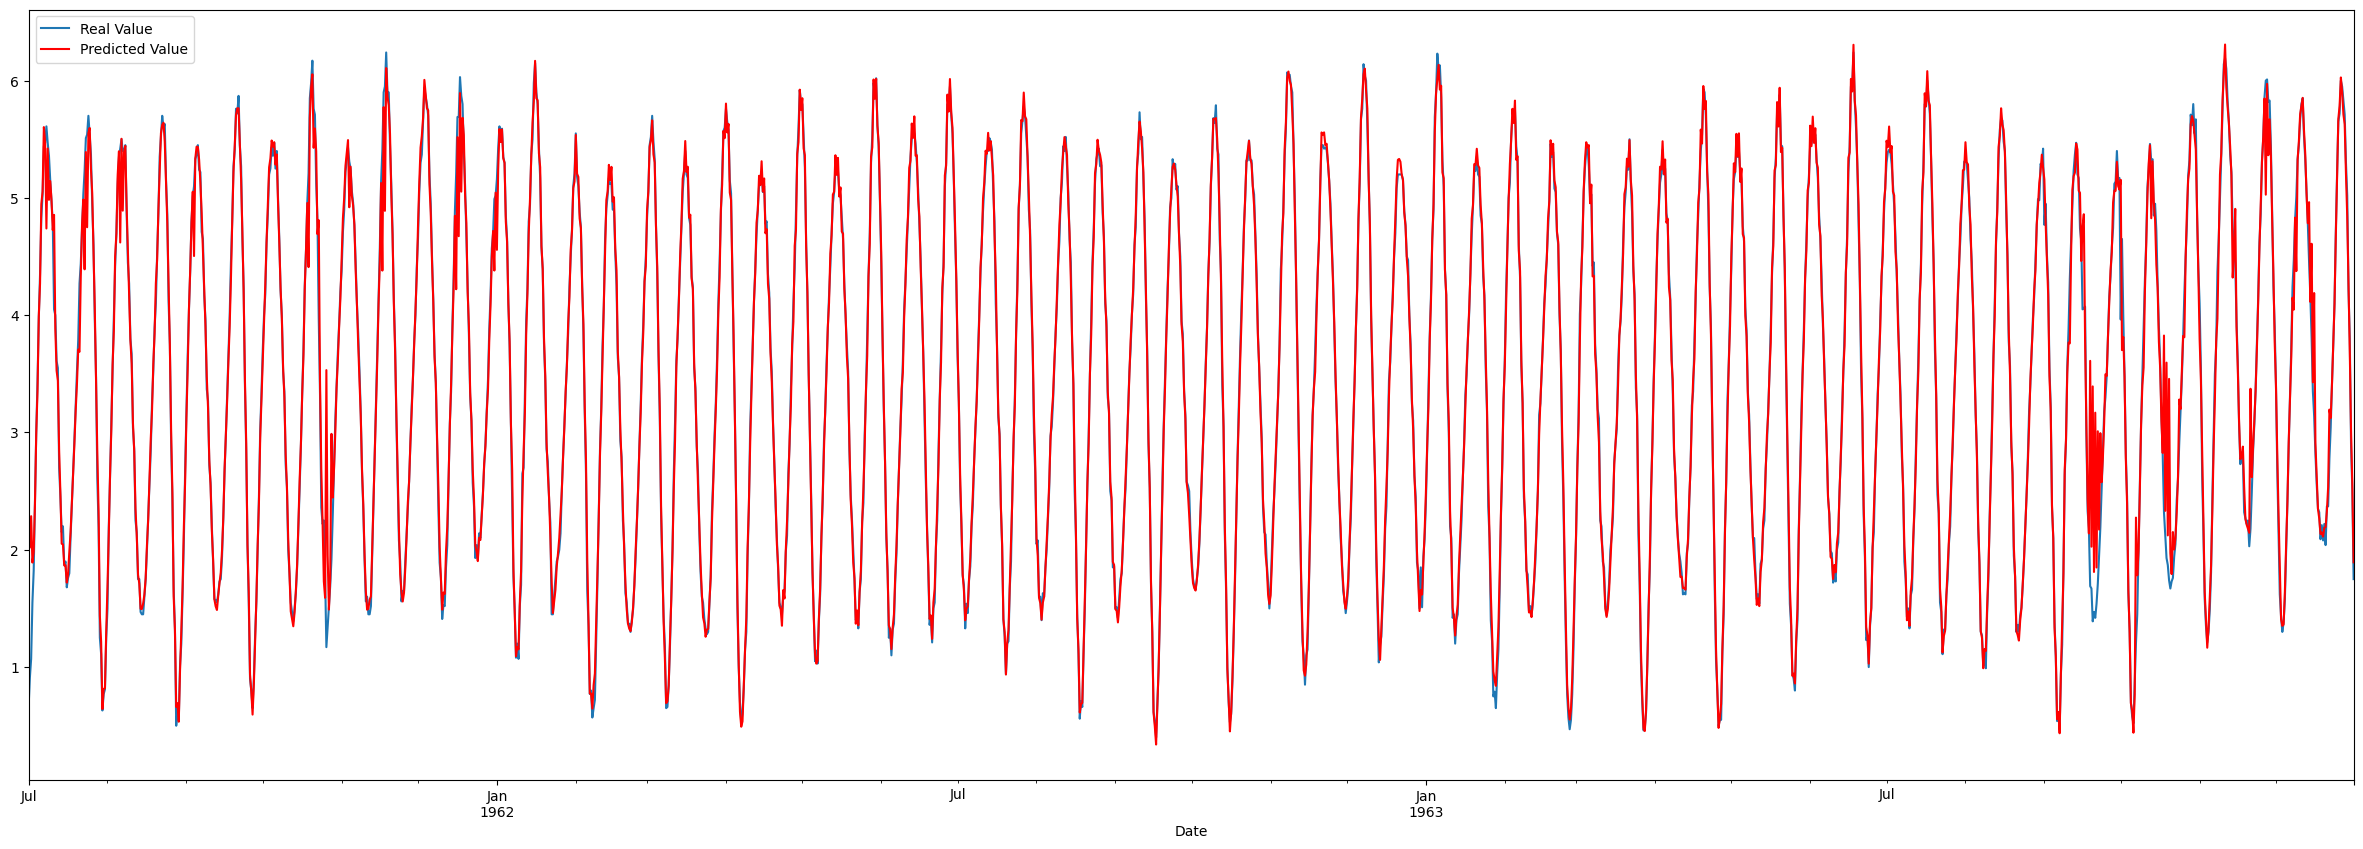

In [261]:
import matplotlib.pyplot as plt

test_dates = test.index
y_df = pd.DataFrame(y_inverse)
y_n_df = pd.DataFrame(y_new_inverse)
y_df.columns = dfcol
y_n_df.columns = dfcol
y_n_df.index = test_dates
y_df.index = test_dates
axes = y_df[dfcol].plot(figsize=(30, 10), subplots=True)
y_n_df[dfcol].plot(figsize=(30, 10), subplots=True, ax = axes, color='red')
plt.legend(['Real Value', 'Predicted Value'])
plt.savefig('prediction_1958.png')

In [262]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

def stats_model(model_num, plot_df, pred_df, num_target=1):
    """
    Function for predictions metrics
    """
    rmse = list()  # Mean Squared Error
    mse = list()  # root-mean-square error
    rsq2 = list()  # coefficient of determination
    MedAE = list()  # median_absolute_error
    MAE = list()  # mean_absolute_error
    MaxErr = list()  # max_error

    
    for i in range(0,num_target):
        m = mean_squared_error(plot_df.iloc[:,i], pred_df.iloc[:,i])
        rmse.append(np.sqrt(m))
        mse.append(m)
        rsq2.append(r2_score(plot_df.iloc[:,i], pred_df.iloc[:,i]))
        MAE.append(mean_absolute_error(plot_df.iloc[:,i], pred_df.iloc[:,i]))
        MedAE.append(median_absolute_error(plot_df.iloc[:,i], pred_df.iloc[:,i]))
        MaxErr.append(max_error(plot_df.iloc[:,i], pred_df.iloc[:,i]))
        

    results = pd.DataFrame(mse)
    results.insert(1, 'RMSE', rmse) 
    results.insert(2, 'R^2', rsq2)
    results.insert(3, 'MAE', MAE)
    results.insert(4, 'MedAE', MedAE)
    results.insert(5, 'MaxErr', MaxErr)
    results.rename(columns = {0:'MSE'}, inplace = True) 
    results.to_csv('Model'+str(model_num)+'.csv')

In [263]:
stats_model(1, y_df, y_n_df, 1)

In [264]:
model1 = read_csv('Model1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_32543/3626950273.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  model1 = read_csv('Model1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [265]:
model1

,MSE,RMSE,R^2,MAE,MedAE,MaxErr
0,0.03731,0.193157,0.984204,0.088998,0.052994,2.361699


<br>

<br>

### Trash

In [266]:
"""
sc_X1 = StandardScaler()
sc_y1 = StandardScaler()

Y_train1 = train['Valeur'].values.reshape(-1,1)
cols = [c for c in train.columns if c.lower()[:11] == 'valeur']
X_train1 = train[cols]
X_train1 = X_train1.drop(columns=['Valeur'])
Y_train1 = sc_y1.fit_transform(Y_train1)
X_train1 = sc_X1.fit_transform(X_train1)

Y_test1 = test['Valeur'].values.reshape(-1,1)
cols2 = [c for c in test.columns if c.lower()[:11] == 'valeur']
X_test1 = test[cols2]
X_test1 = X_test1.drop(columns=['Valeur'])
X_test1 = sc_X1.fit_transform(X_test1)
Y_test1 = sc_y1.fit_transform(Y_test1)
"""

"\nsc_X1 = StandardScaler()\nsc_y1 = StandardScaler()\n\nY_train1 = train['Valeur'].values.reshape(-1,1)\ncols = [c for c in train.columns if c.lower()[:11] == 'valeur']\nX_train1 = train[cols]\nX_train1 = X_train1.drop(columns=['Valeur'])\nY_train1 = sc_y1.fit_transform(Y_train1)\nX_train1 = sc_X1.fit_transform(X_train1)\n\nY_test1 = test['Valeur'].values.reshape(-1,1)\ncols2 = [c for c in test.columns if c.lower()[:11] == 'valeur']\nX_test1 = test[cols2]\nX_test1 = X_test1.drop(columns=['Valeur'])\nX_test1 = sc_X1.fit_transform(X_test1)\nY_test1 = sc_y1.fit_transform(Y_test1)\n"

In [267]:
"""
sc_x2 = StandardScaler()
sc_y2 = StandardScaler()

Y_train2 = train1['Valeur'].values.reshape(-1,1)
X_train2 = train1[dfcol].drop(columns=['Valeur'])
Y_train2 = sc_y2.fit_transform(Y_train2)
X_train2 = sc_x2.fit_transform(X_train2)

Y_test2 = test1['Valeur'].values.reshape(-1,1)
X_test2 = test1[dfcol].drop(columns=['Valeur'])
X_test2 = sc_x2.fit_transform(X_test2)
Y_test2 = sc_y2.fit_transform(Y_test2)
X_test2.shape
"""

"\nsc_x2 = StandardScaler()\nsc_y2 = StandardScaler()\n\nY_train2 = train1['Valeur'].values.reshape(-1,1)\nX_train2 = train1[dfcol].drop(columns=['Valeur'])\nY_train2 = sc_y2.fit_transform(Y_train2)\nX_train2 = sc_x2.fit_transform(X_train2)\n\nY_test2 = test1['Valeur'].values.reshape(-1,1)\nX_test2 = test1[dfcol].drop(columns=['Valeur'])\nX_test2 = sc_x2.fit_transform(X_test2)\nY_test2 = sc_y2.fit_transform(Y_test2)\nX_test2.shape\n"

In [268]:
"""
param = {'kernel' : ['rbf'],'C' : [1,5],'gamma' : ('auto','scale')}
mod2 = GridSearchCV(SVR(),param,cv=5,n_jobs=4)
model3 = mod2.fit(X_train2,Y_train2)
"""

"\nparam = {'kernel' : ['rbf'],'C' : [1,5],'gamma' : ('auto','scale')}\nmod2 = GridSearchCV(SVR(),param,cv=5,n_jobs=4)\nmodel3 = mod2.fit(X_train2,Y_train2)\n"

In [269]:
"""
mod1 = SVR(kernel='rbf')
model2 = mod1.fit(X_train1,Y_train1)
"""

"\nmod1 = SVR(kernel='rbf')\nmodel2 = mod1.fit(X_train1,Y_train1)\n"

In [270]:
"""
y_pred1 = model2.predict(X_test1)
y_new_inverse1 = sc_y1.inverse_transform(y_pred1)
y_inverse1 = sc_y1.inverse_transform(Y_test1)
"""

'\ny_pred1 = model2.predict(X_test1)\ny_new_inverse1 = sc_y1.inverse_transform(y_pred1)\ny_inverse1 = sc_y1.inverse_transform(Y_test1)\n'

In [271]:
"""
y_pred2 = model3.predict(X_test2)
y_new_inverse2 = sc_y2.inverse_transform(y_pred2)
y_inverse2 = sc_y2.inverse_transform(Y_test2)
"""

'\ny_pred2 = model3.predict(X_test2)\ny_new_inverse2 = sc_y2.inverse_transform(y_pred2)\ny_inverse2 = sc_y2.inverse_transform(Y_test2)\n'